In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Ini dipakai kalau data mentah
import pandas as pd
# data = pd.read_excel('/content/drive/MyDrive/Skripsi/Data/dataset.xlsx')
data = pd.read_excel('dataset.xlsx')
data = data.reset_index(drop=True)
data.head(25)

In [ ]:
# # #Ini dipakai kalau data mentah
# data.info()

In [ ]:
# #Ini dipakai kalau data mentah
data.groupby('label_berita').count()

In [ ]:
# #Ini dipakai kalau data mentah
cat = []
for i in range(len(data)):
    if data.label_berita[i] == 'valid':
        cat.append(1)
    else:
        cat.append(0)

In [ ]:
# #Ini dipakai kalau data mentah
data['cat'] = cat
data.head()

In [ ]:
# # Ini dipakai kalau data mentah
data.isna().sum()

In [ ]:
import re

In [ ]:
# membuat fungsi case folding
def casefolding(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+','',text)
    text = re.sub(r'[-+]?[0-9]+','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('\n',' ',text)
    text = text.strip()
    return text


#contoh
# judul = input("masukan : ")
# # judul = data.judul[1]
# text_casefolding = casefolding(judul)

# print('original text:',judul)
# print('')
# print('casefolding text:',text_casefolding)

In [ ]:
import pandas as pd
key_norm = pd.read_csv('key_norm.csv')
key_norm.head(10)

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi
5,6,acra,acara
6,7,acrany,acaranya
7,8,acrnya,acaranya
8,9,action,aksi
9,10,active,aktif


In [ ]:
# membuat fungsi untuk menormalisasi teks
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_indo = stopwords.words('indonesian')
len(stopwords_indo)
print(stopwords_indo)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# membuat fungsi untuk remove stopwords
def remove_stopwords(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_indo:
            clean_words.append(word)
    return " ".join(clean_words)
# contoh
# raw_text = data.judul[1]
# raw_text=input('masukan: ')
# # text_casefolding = casefolding(raw_text)
# # text_clean = remove_stopwords(text_casefolding)
# text_clean = remove_stopwords(raw_text)
# print('original text:',raw_text)
# print('')
# # print('casefolding text:',text_casefolding)
# print('')
# print('stopwords removal:',text_clean)

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
fac = StemmerFactory()
stm = fac.create_stemmer()

# membuat fungsi untuk langkah stemming bahasa indonesia
def stemming(text):
  text = stm.stem(text)
  return text


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def tokenization(text):
    # Tokenisasi menggunakan NLTK
    tokens = word_tokenize(text)

    # Mengembalikan list token
    return tokens
# judul = data.judul[1]
# tokens = tokenization(judul)
# print(tokens)

In [ ]:
# membuat fungsi text preprocessing
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text



In [ ]:
# Ini dipakai kalau data mentah
%%time
data['clean_teks'] = data['judul'].apply(text_preprocessing)

In [ ]:
# Ini dipakai kalau data mentah
%%time
data['token'] = data['clean_teks'].apply(tokenization)

In [ ]:
# Ini dipakai kalau data mentah
data.head()

In [ ]:
# # Ini dipakai kalau data mentah
data.duplicated(subset=['clean_teks']).any()

data_baru = data.drop_duplicates(subset=['clean_teks'],keep='first')
data = data_baru.reset_index(drop=True)
data.to_excel('data_scraping_clean.xlsx')

In [ ]:
import pandas as pd
data = pd.read_excel('data_scraping_clean.xlsx')
data.duplicated(subset=['token']).any()

False

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,judul,label_berita,cat,clean_teks,token
0,0,0,Isu kebocoran data pemerintah menjadi pembicar...,valid,1,isu bocor data perintah bicara serius muncul h...,"['isu', 'bocor', 'data', 'perintah', 'bicara',..."
1,1,1,Ma’ruf Amin Sebut Memilih Jokowi dengan Diriny...,hoaks,0,maruf amin pilih joko widodo kantong tiket surga,"['maruf', 'amin', 'pilih', 'joko', 'widodo', '..."
2,2,2,Pemerintah akan menerapkan PPKM sejak 11 sampa...,valid,1,perintah terap ppkm januari daerah istilah bed...,"['perintah', 'terap', 'ppkm', 'januari', 'daer..."
3,3,3,"Soal Teka-teki Partai yang Bakal Merapat, Ganj...",valid,1,tekateki partai rapat ganjar kuning komunikasi,"['tekateki', 'partai', 'rapat', 'ganjar', 'kun..."
4,4,4,“LARI DARI TANGGUNG JAWAB APARAT TERPAKSA LUMP...,hoaks,0,lari tanggung aparat paksa lumpuh kaki gubernu...,"['lari', 'tanggung', 'aparat', 'paksa', 'lumpu..."


In [ ]:
data.groupby('label_berita').count()

,Unnamed: 0.1,Unnamed: 0,judul,cat,clean_teks,token
label_berita,,,,,,
hoaks,1383,1383,1383,1383,1382,1383
valid,1376,1376,1376,1376,1376,1376


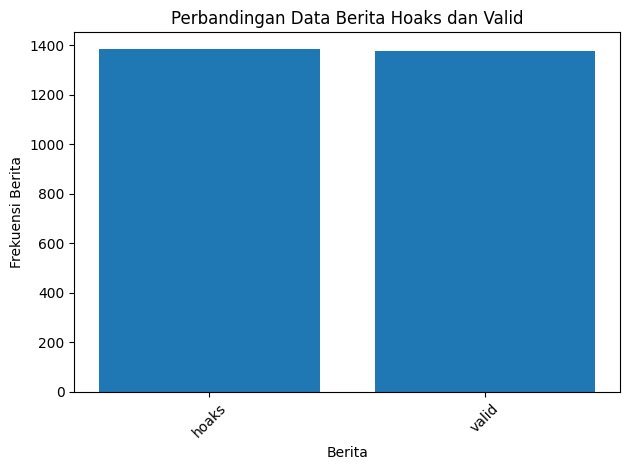

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


text = ' '.join(data['label_berita'])
words = text.lower().split()

word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
words, counts = zip(*top_10_words)

plt.bar(words, counts)
plt.xlabel('Berita')
plt.ylabel('Frekuensi Berita')
plt.title('Perbandingan Data Berita Hoaks dan Valid')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


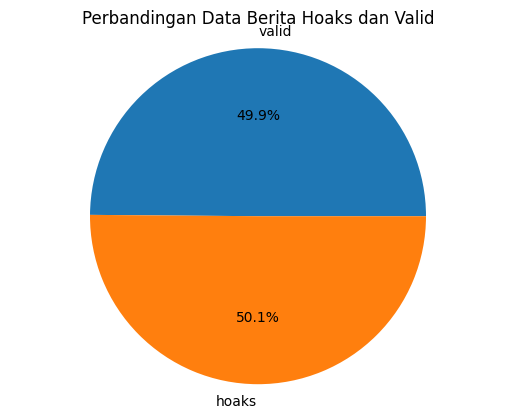

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

data = pd.read_excel('data_scraping_clean.xlsx')

text = ' '.join(data['label_berita'])
words = text.lower().split()

word_counts = Counter(words)
labels, counts = zip(*word_counts.items())

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Perbandingan Data Berita Hoaks dan Valid')
plt.axis('equal')
plt.savefig('templates/diagram_berita.png')


plt.show()








Data Visualisasi

In [ ]:
import pandas as pd

# Baca data Excel
data = pd.read_excel('data_scraping_clean.xlsx')

from collections import Counter

data = data.dropna(subset=['clean_teks'])

# Menggabungkan teks dari kolom berita hoaks menjadi satu string
hoaks_text = ' '.join(data[data['label_berita'] == 'hoaks']['clean_teks'].tolist())

# Menggabungkan teks dari kolom berita valid menjadi satu string
valid_text = ' '.join(data[data['label_berita'] == 'valid']['clean_teks'].tolist())

# Hitung frekuensi kemunculan kata-kata dalam berita hoaks
hoaks_word_freq = Counter(hoaks_text.split())

# Hitung frekuensi kemunculan kata-kata dalam berita valid
valid_word_freq = Counter(valid_text.split())


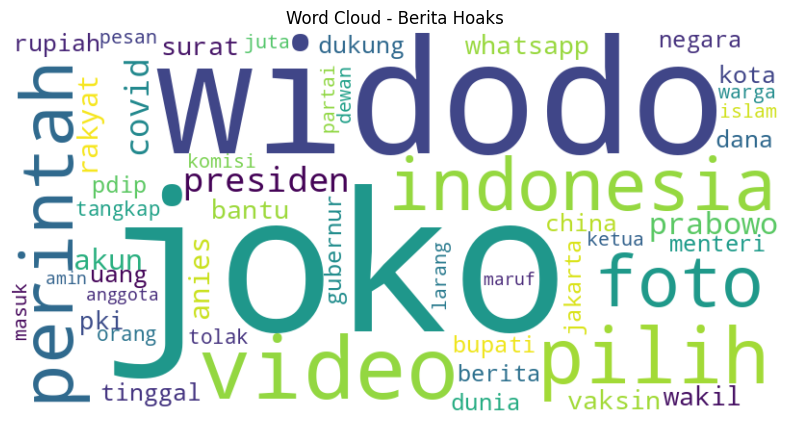

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

maks = 50

# Visualisasi Word Cloud untuk berita hoaks
hoaks_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words= maks).generate_from_frequencies(hoaks_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(hoaks_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Berita Hoaks')
plt.axis('off')
plt.savefig('templates/wordcloud_hoaks.png')

plt.show()




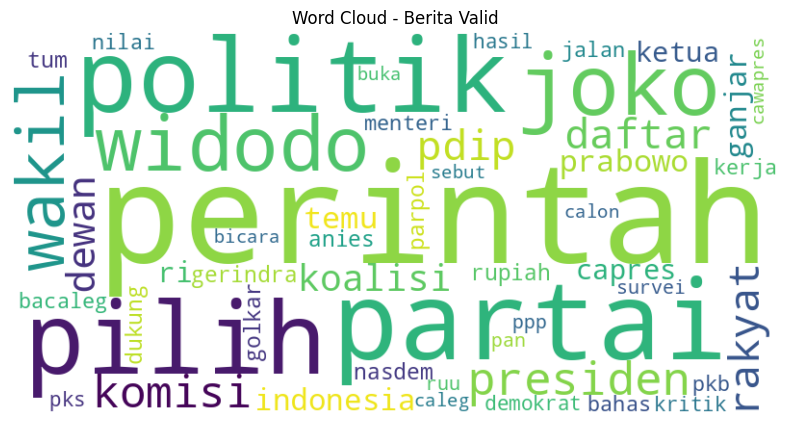

In [ ]:
# Visualisasi Word Cloud untuk berita valid
valid_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words= maks).generate_from_frequencies(valid_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(valid_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Berita Valid')
plt.axis('off')
plt.savefig('templates/wordcloud_valid.png')


plt.show()





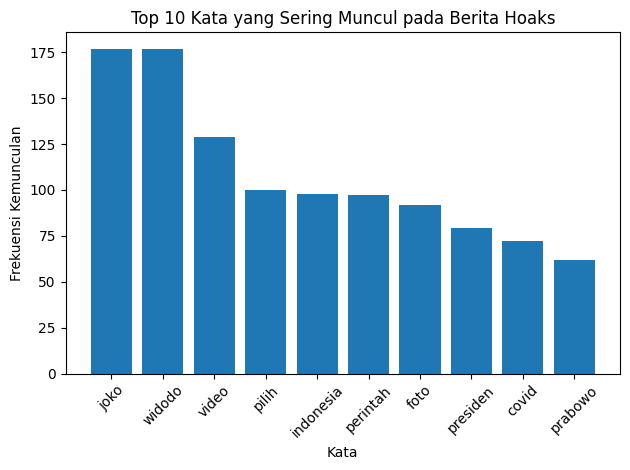

(177, 177, 129, 100, 98, 97, 92, 79, 72, 62)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


text = ' '.join(data[data['label_berita'] == 'hoaks']['clean_teks'].tolist())
words = text.lower().split()

word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
words, counts = zip(*top_10_words)

plt.bar(words, counts)
plt.xlabel('Kata')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Top 10 Kata yang Sering Muncul pada Berita Hoaks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('templates/top_hoaks.png')


plt.show()
print(counts)



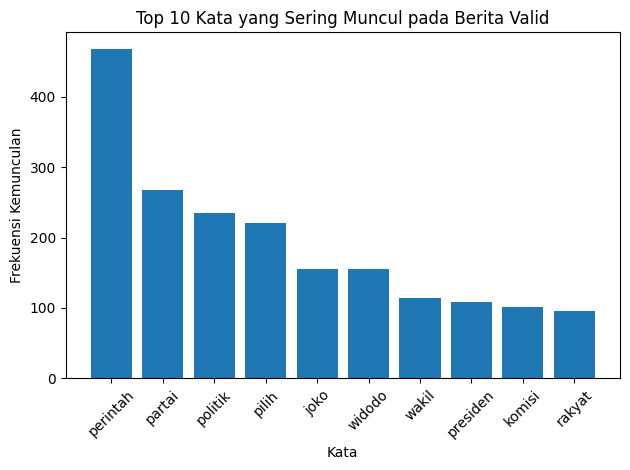

(468, 267, 235, 221, 155, 155, 114, 109, 102, 95)


In [ ]:

text = ' '.join(data[data['label_berita'] == 'valid']['clean_teks'].tolist())
words = text.lower().split()

word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
words, counts = zip(*top_10_words)

plt.bar(words, counts)
plt.xlabel('Kata')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Top 10 Kata yang Sering Muncul pada Berita Valid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('templates/top_valid.png')


plt.show()
print(counts)


In [ ]:
# import pandas as pd
# data = pd.read_excel('hitung.xlsx')
# data.duplicated(subset=['token']).any()

In [ ]:
x = data['token']
y = data['cat']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_tf_idf = TfidfVectorizer (smooth_idf=True, sublinear_tf=True)
vec_tf_idf.fit(x)

x_tf_idf = vec_tf_idf.transform(x)
vec_tf_idf.vocabulary_

{'isu': 1684,
 'bocor': 571,
 'data': 870,
 'perintah': 3189,
 'bicara': 528,
 'serius': 3878,
 'muncul': 2765,
 'hacker': 1384,
 'bjorka': 559,
 'maruf': 2527,
 'amin': 159,
 'pilih': 3235,
 'joko': 1812,
 'widodo': 4692,
 'kantong': 1904,
 'tiket': 4354,
 'surga': 4128,
 'terap': 4313,
 'ppkm': 3334,
 'januari': 1742,
 'daerah': 844,
 'istilah': 1679,
 'beda': 455,
 'batas': 431,
 'sosial': 4015,
 'skala': 3972,
 'psbb': 3412,
 'tekateki': 4266,
 'partai': 3085,
 'rapat': 3506,
 'ganjar': 1235,
 'kuning': 2244,
 'komunikasi': 2125,
 'lari': 2311,
 'tanggung': 4215,
 'aparat': 226,
 'paksa': 3014,
 'lumpuh': 2424,
 'kaki': 1869,
 'gubernur': 1355,
 'dki': 985,
 'tanggal': 4212,
 'coblos': 803,
 'partaipartai': 3086,
 'dewan': 929,
 'wakil': 4653,
 'rakyat': 3484,
 'selenggara': 3810,
 'komisi': 2112,
 'sikap': 3918,
 'bakso': 360,
 'ayam': 314,
 'blender': 561,
 'hasil': 1443,
 'kenyal': 1999,
 'gurih': 1370,
 'video': 4615,
 'masjid': 2540,
 'tutup': 4503,
 'katedral': 1934,
 'buka':

In [ ]:
len(vec_tf_idf.get_feature_names_out())

4771

In [ ]:
x1 = x_tf_idf.toarray()
data_tf_idf = pd.DataFrame(x1,columns=vec_tf_idf.get_feature_names_out())
data_tf_idf.head(100)

,aamiin,abad,abadi,abar,abbas,abbasiyah,abdi,abdul,abdullah,abdy,...,zayedalias,zealand,zelensky,zina,zon,zona,zubair,zulhas,zulkarnain,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# data_tf_idf.to_excel('hitungnonorm.xlsx')

In [ ]:
# menyimpan dictionary
import pickle

pickle.dump(data_tf_idf,open('tfidf.pkl','wb'))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
x = data_tf_idf
y = data['cat']

In [ ]:
# membuat split data train dan  test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=42)
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

# Train Model
text_algorithm = BernoulliNB()
model_nb = text_algorithm.fit(x_train,y_train)

Banyak data x_train : 2482
Banyak data x_test  : 276
Banyak data y_train : 2482
Banyak data y_test  : 276


In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Mengurutkan data berdasarkan urutan yang diinginkan
# sorted_indices = np.arange(len(x))
# np.random.shuffle(sorted_indices)

# x_sorted = x.iloc[sorted_indices]
# y_sorted = y.iloc[sorted_indices]

# # Menentukan proporsi split
# train_proportion = 0.9

# # Menghitung jumlah baris untuk set pelatihan
# train_rows = int(train_proportion * len(x_sorted))

# # Membagi data menjadi set pelatihan dan pengujian
# x_train = x_sorted.iloc[:train_rows]
# y_train = y_sorted.iloc[:train_rows]
# x_test = x_sorted.iloc[train_rows:]
# y_test = y_sorted.iloc[train_rows:]

# # Menampilkan informasi tentang jumlah data
# print('Banyak data x_train:', len(x_train))
# print('Banyak data x_test:', len(x_test))
# print('Banyak data y_train:', len(y_train))
# print('Banyak data y_test:', len(y_test))

# # # Train Model
# # text_algorithm = BernoulliNB()
# # model_nb = text_algorithm.fit(x_train, y_train)


In [ ]:
# Train Model
text_algorithm2 = GaussianNB()
model_nb2 = text_algorithm2.fit(x_train,y_train)

In [ ]:
# Train Model
text_algorithm3 = MultinomialNB()
model_nb3 = text_algorithm3.fit(x_train,y_train)

In [ ]:
#membuat model ke file pickle


pickle.dump(model_nb,open('nb.pkl','wb'))
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
import numpy as np
np.array(y_test)

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Train model
# rf = RandomForestClassifier(n_estimators = 1000, random_state=0)
random = RandomForestClassifier(random_state=42,criterion="entropy", max_depth=3)
model_random = random.fit(x_train,y_train)
# membuat model ke file pickle

pickle.dump(model_random,open('random_forest.pkl','wb'))
y_pred_random = random.predict(x_test)
y_pred_random


array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 6.0 MB/s eta 0:00:00


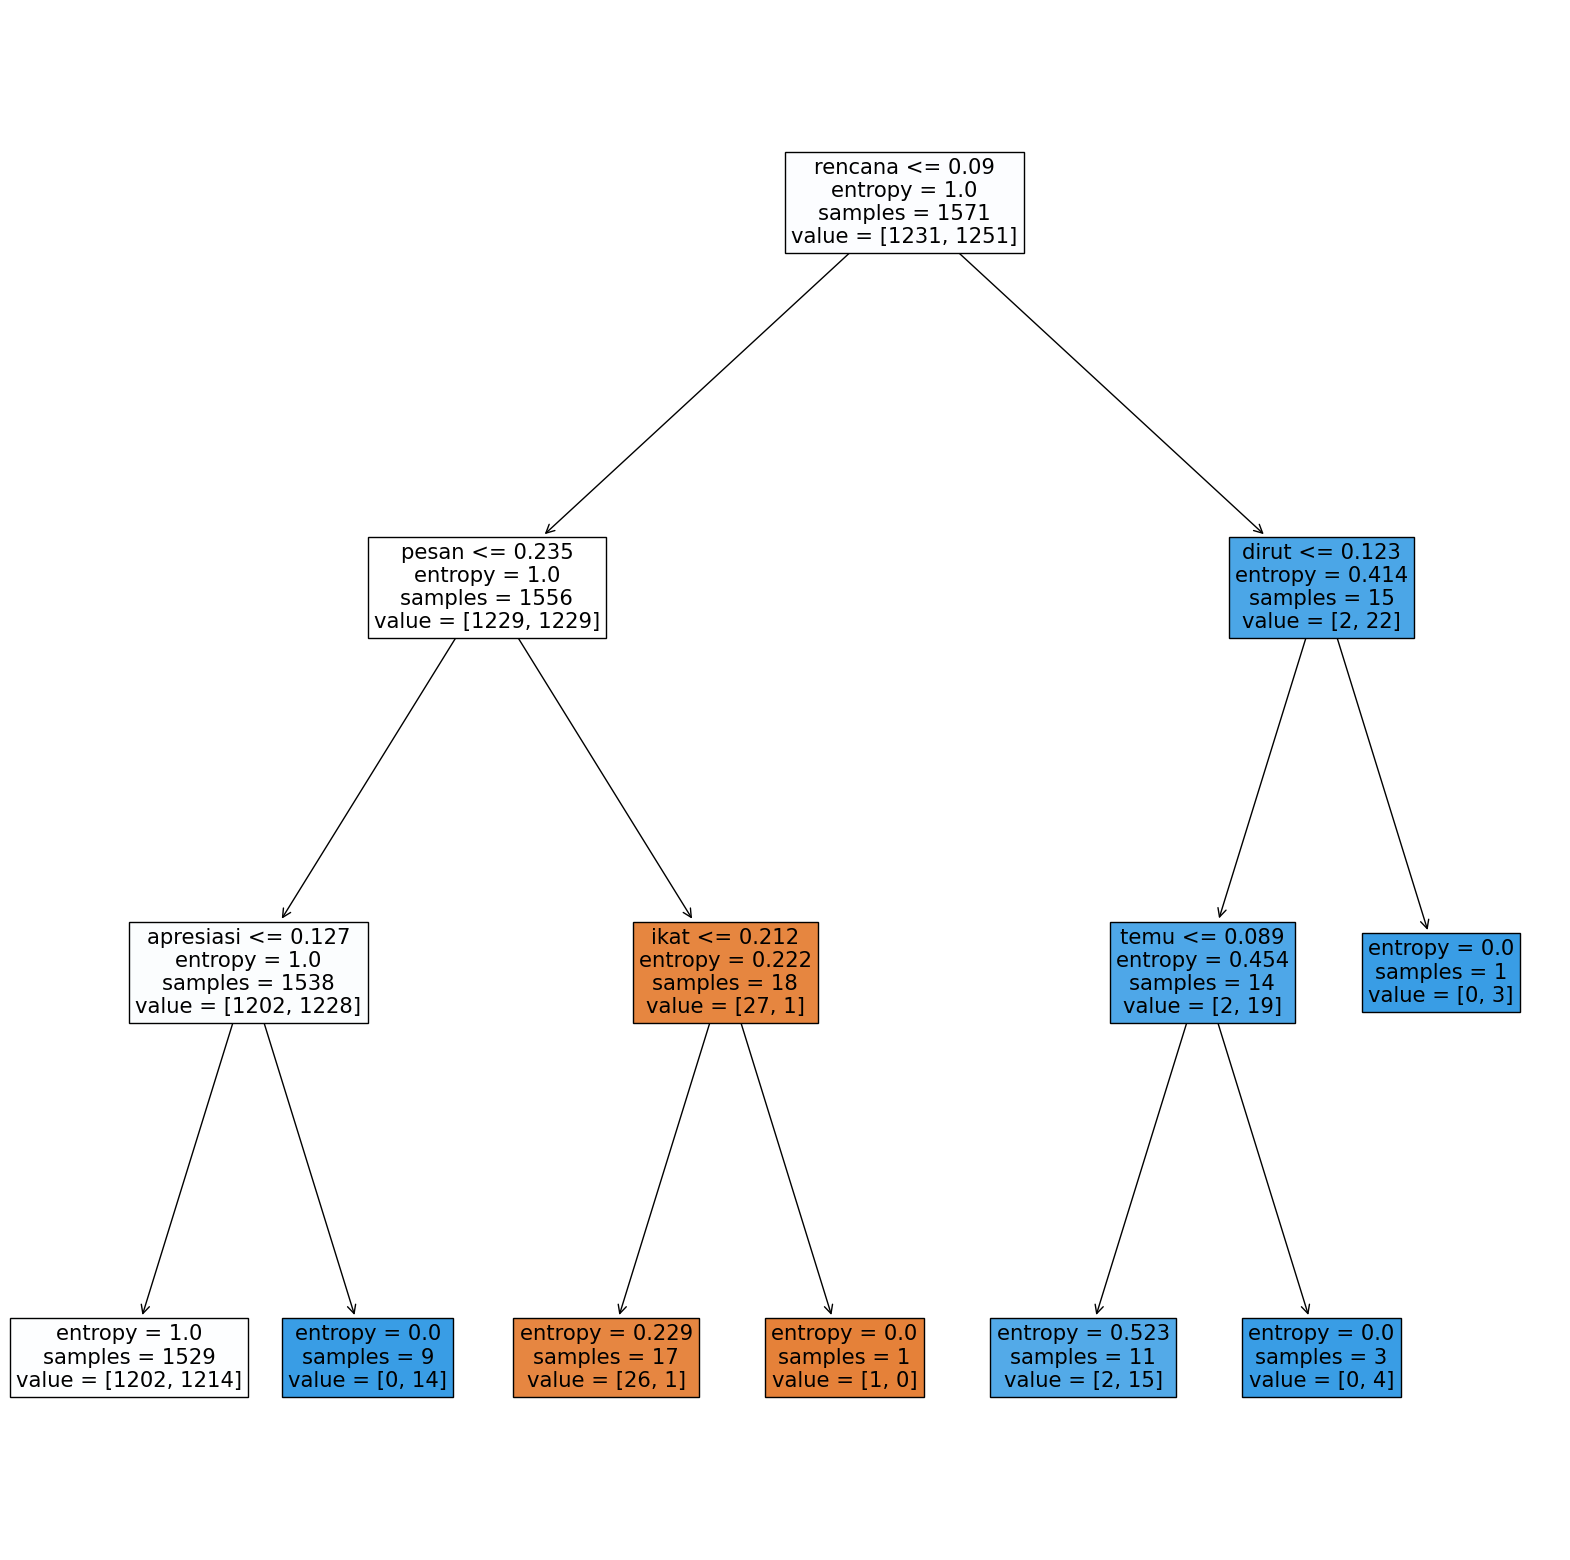

In [ ]:
from sklearn import tree
import dtreeviz # will be used for tree visualization
# from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(20,20))
_ = tree.plot_tree(random.estimators_[2], feature_names=x.columns, filled=True)

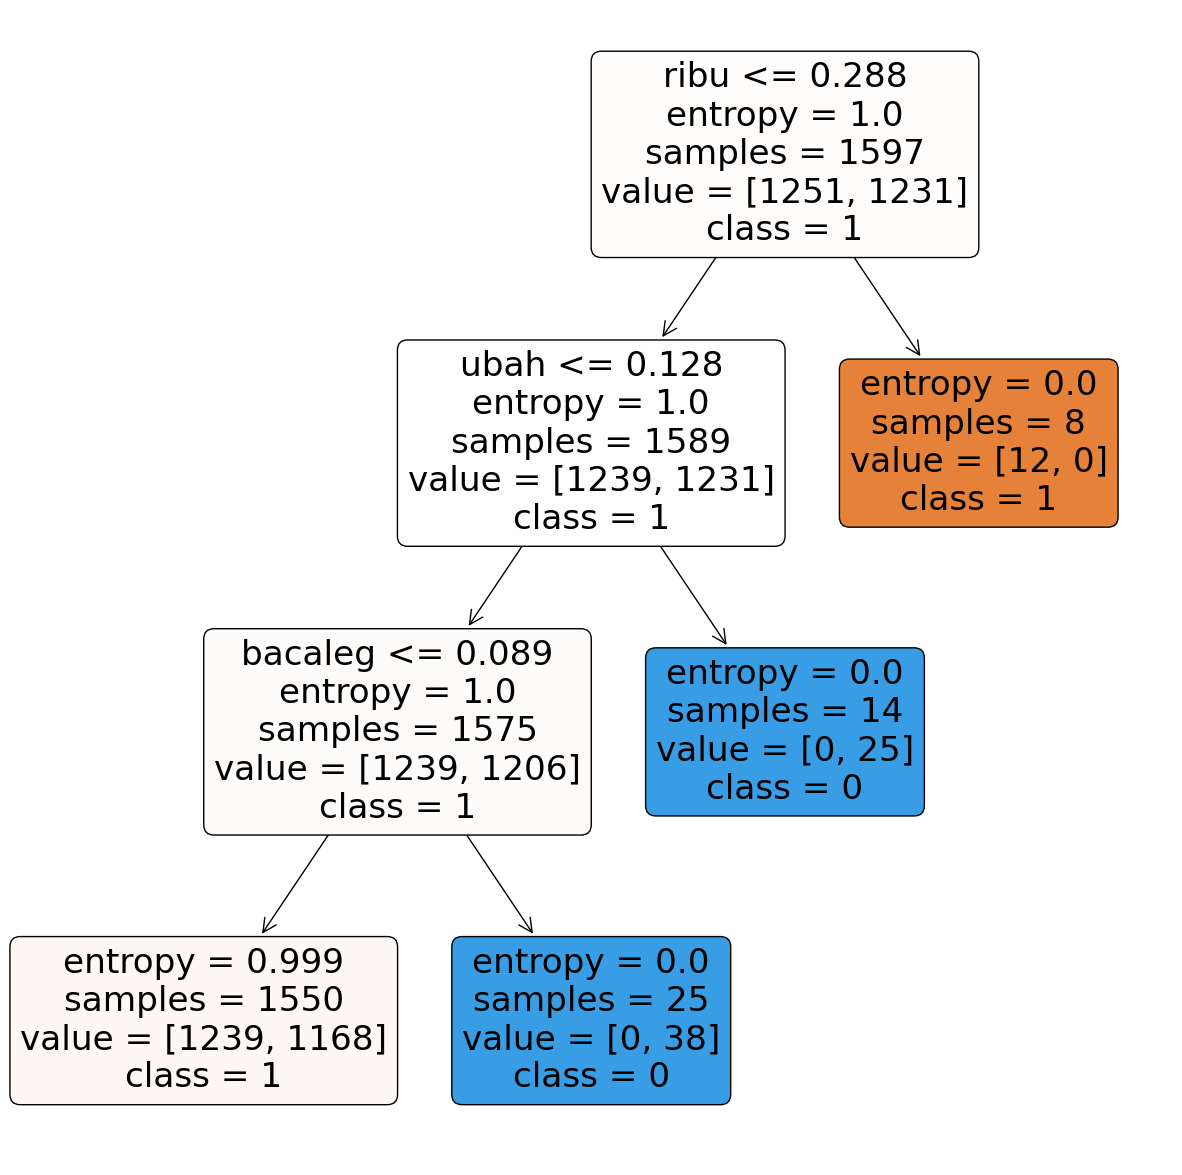

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 15))
plot_tree(random.estimators_[0],
          feature_names = [str(feature) for feature in x.columns],
          class_names = [str(cls) for cls in y.unique()],
          filled=True, impurity=True,
          rounded=True)
fig.savefig('figure_name.png')

In [ ]:
#menampilkan 1 Pohon Keputusan
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pickle


# Dapatkan pohon keputusan pertama dari Random Forest
decision_tree = random.estimators_[0]

# Konversi tipe data fitur dan kelas menjadi string
feature_names = [str(feature) for feature in x.columns]
class_names = [str(cls) for cls in y.unique()]

# Visualisasikan pohon keputusan menggunakan Graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=feature_names, class_names=class_names)

graph = graphviz.Source(dot_data)

# Tampilkan pohon keputusan
graph.view()


'Source.gv.pdf'

In [ ]:
# #menampilkan pohon keputusan tetapi beda

# from sklearn import tree
# from sklearn.tree import export_graphviz
# import graphviz
# import pickle

# # Dapatkan tiga pohon keputusan pertama dari Random Forest
# decision_trees = random.estimators_[:3]

# # Konversi tipe data fitur dan kelas menjadi string
# feature_names = [str(feature) for feature in x.columns]
# class_names = [str(cls) for cls in y.unique()]

# # Buat objek Graphviz untuk menampung pohon-pohon keputusan
# combined_graph = graphviz.Digraph()

# # Tambahkan setiap pohon keputusan ke objek Graphviz
# for i, decision_tree in enumerate(decision_trees):
#     # Visualisasikan pohon keputusan menggunakan Graphviz
#     dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=feature_names, class_names=class_names)

#     # Buat objek Graphviz untuk pohon keputusan
#     subgraph = graphviz.Source(dot_data)

#     # Tambahkan node pohon keputusan ke objek Graphviz
#     subgraph_dot = subgraph.source
#     combined_graph.node(subgraph_dot)

# # Simpan grafik gabungan sebagai file PDF
# combined_graph.render("combined_decision_trees")


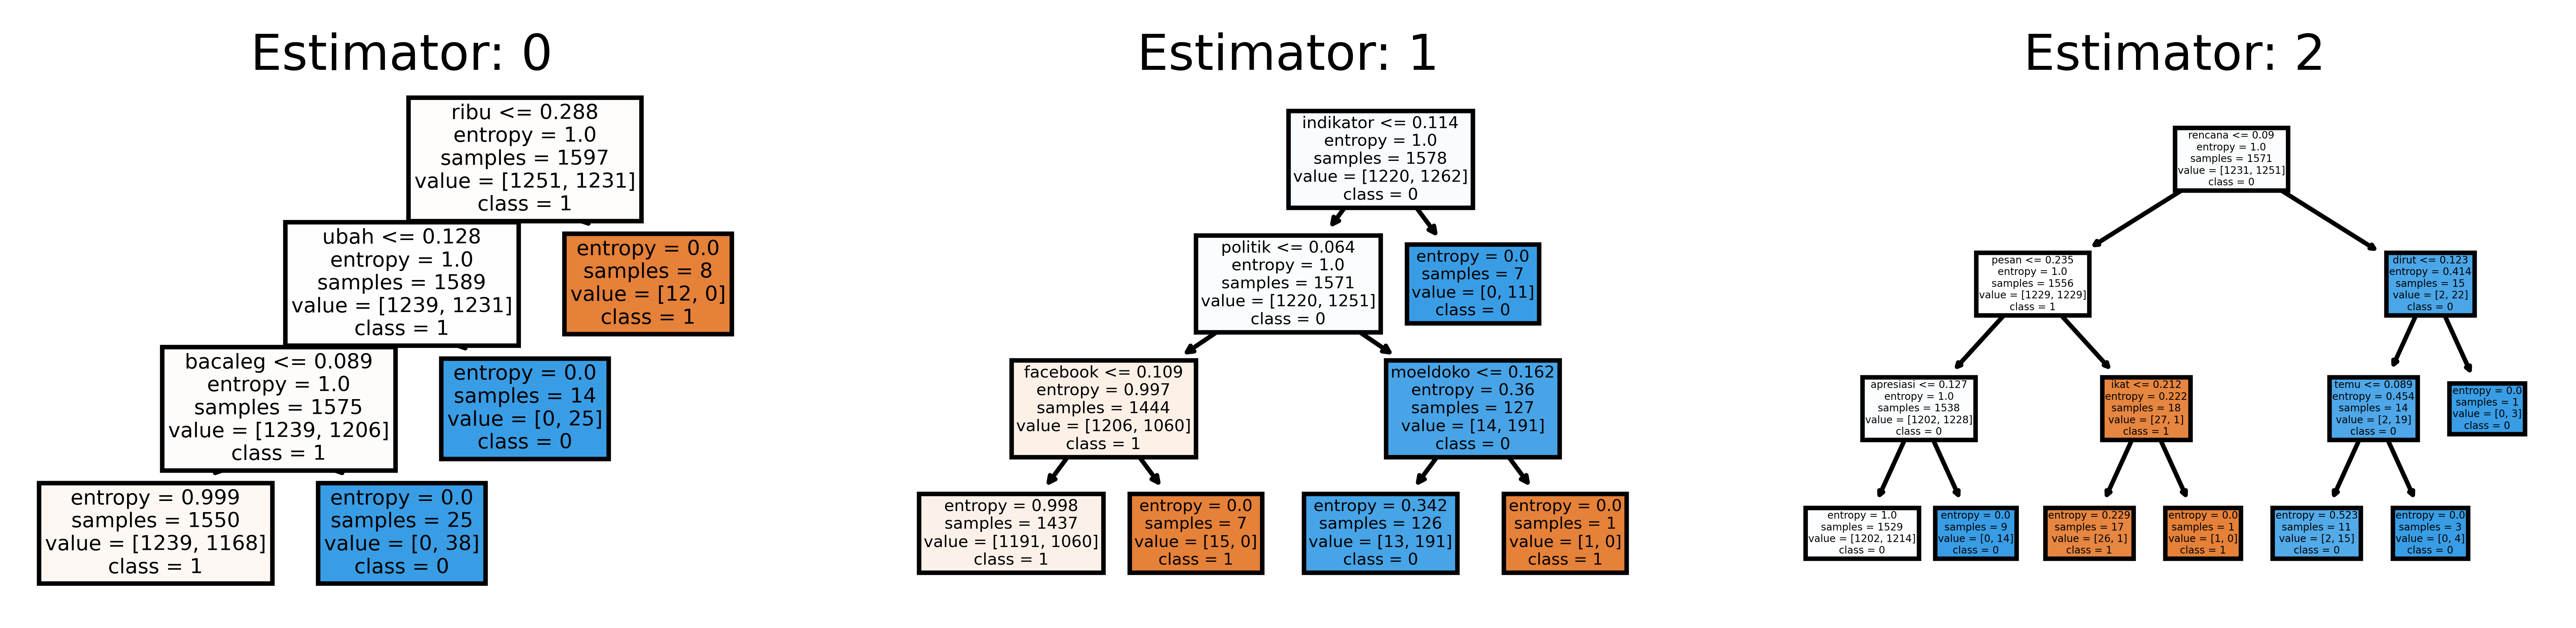

In [ ]:
#Menampilkan pohon keputusan untuk perhitungan

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
foto, axe = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(random.estimators_[index],
                   feature_names = [str(feature) for feature in x.columns],
                   class_names = [str(cls) for cls in y.unique()],
                   filled = True,
                   ax = axe[index]);

    axe[index].set_title('Estimator: ' + str(index), fontsize = 11)
foto.savefig('templates/rf_3trees.png')

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree
# from sklearn.tree import export_graphviz
# import graphviz
# import pickle

# # Train model Random Forest
# random = RandomForestClassifier(random_state=42, criterion="entropy")
# model_random = random.fit(x_train, y_train)

# # Simpan model ke file pickle
# pickle.dump(model_random, open('random_forest.pkl', 'wb'))

# # Prediksi menggunakan model Random Forest
# y_pred_random = random.predict(x_test)

# # Dapatkan jumlah pohon dalam Random Forest
# # num_trees = len(model_random.estimators_)

# # Iterasi untuk memecah dan memvisualisasikan setiap pohon
# for i in range(10):
#     # Dapatkan pohon keputusan pada indeks ke-i
#     decision_tree = model_random.estimators_[i]

#     feature_names = [str(feature) for feature in x.columns]
#     class_names = [str(cls) for cls in y.unique()]

#     # Visualisasikan pohon keputusan menggunakan Graphviz
#     dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=feature_names, class_names=class_names)
#     graph = graphviz.Source(dot_data)

#     # Simpan visualisasi pohon keputusan ke file
#     graph.render("decision_tree_{}".format(i))

#     # Tampilkan visualisasi pohon keputusan
#     graph.view()


In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
# melakukan evaluasi MSE
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('Akurasi Naive Bayes:',metrics.accuracy_score(y_test,y_pred_nb))

print('Akurasi Random Forest:',metrics.accuracy_score(y_test,y_pred_random))

Akurasi Naive Bayes: 0.8840579710144928
Akurasi Random Forest: 0.8333333333333334


In [ ]:
print('MSE pada Naive Bayes:',mean_squared_error(y_test,y_pred_nb))

print('MSE pada Random Forest:',mean_squared_error(y_test,y_pred_random))

MSE pada Naive Bayes: 0.11594202898550725
MSE pada Random Forest: 0.16666666666666666


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       147
           1       0.88      0.87      0.88       129

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



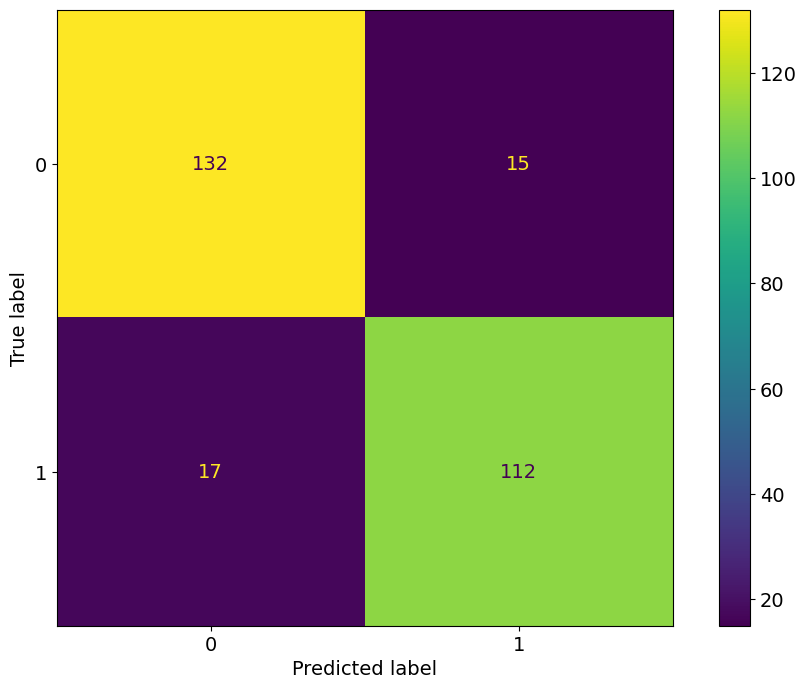

In [ ]:
# from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test,y_pred_nb))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model_nb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_nb)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       147
           1       0.85      0.78      0.81       129

    accuracy                           0.83       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



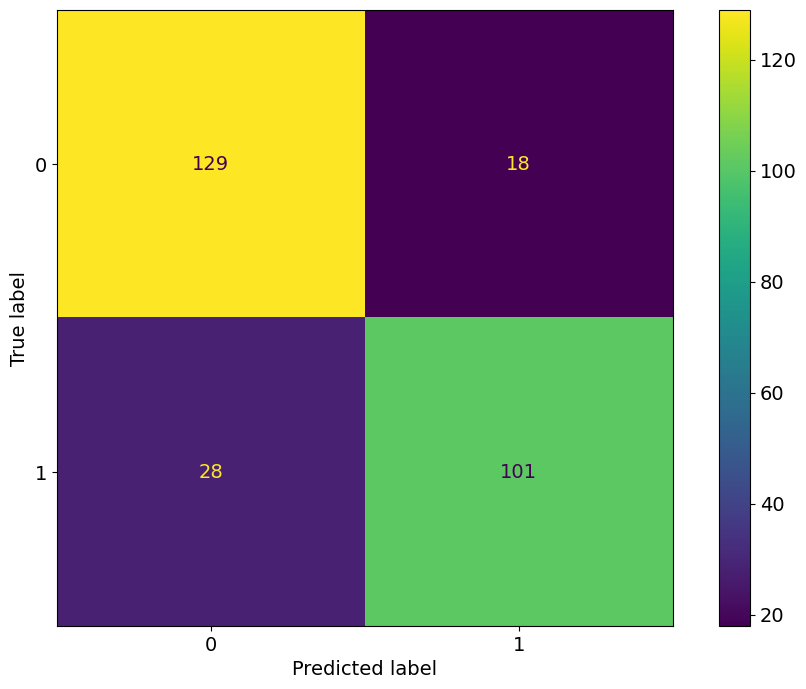

In [ ]:
# from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test,y_pred_rf))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model_random.predict(x_test)
cm = confusion_matrix(y_test, y_pred_random)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# import pickle
# from joblib import load

# file_naive = pickle.load(open('bernoulli_nb.pkl','rb'))
# file_random = pickle.load(open('random_forest.pkl','rb'))


# data_input = input("Masukkan Berita:\n")
# data_input = text_preprocessing(data_input)
# token = tokenization(data_input)
# print('')
# print(' preprocessing:\n',token,'\n')
# tfidf = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("tfidf.pkl", "rb"))))

# analisis = file_naive.predict(tfidf.fit_transform([data_input]))

# if(analisis==0):
#     s ="Cenderung Hoaks"
#     print(analisis)
# else:
#     s ="Bisa dipastiakan valid"
#     print(analisis)
# print("analisis prediksi:\n", s)

In [ ]:
!pip install flask pyngrok
!ngrok authtoken "2PGPgRcRigXHEkR1TcCw6buiwx5_6khAKiwxKCaMkX89oYq1w"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=e3c24bec9281ac7cf99473cb68580089972451ccddeefa206925dc3e4e31c951
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# from flask import Flask, render_template, request
# app = Flask(__name__)
# port = 5000
# @app.route('/', methods=['GET', 'POST'])
# def index():
#     if request.method == 'POST':
#         data_input = request.form['text_input']
#         data_input = text_preprocessing(data_input)
#         token = tokenization(data_input)
#         tfidf = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("tfidf.pkl", "rb"))))
#         analisis = file_naive.predict(tfidf.fit_transform([data_input]))
#         if(analisis==0):
#             s ="Cenderung Hoaks"

#         else:
#             s ="Bisa dipastiakan valid"

#         print("analisis prediksi:\n", s)
#         return render_template('index.html', token=token, analisis=analisis, s=s)
#     return render_template('index.html')
# @app.route('/')
# def home():
#     return render_template('index.html')
# from pyngrok import ngrok
# public_url = ngrok.connect(port).public_url
# print(f'Running Flask app at: {public_url}')
# if __name__ == '__main__':
#     app.run(port=port)


In [ ]:
from flask import Flask, render_template, request, send_from_directory
import os
import pickle
from joblib import load
from pyngrok import ngrok

app = Flask(__name__)
port = 5000
# Load train models
file_naive = pickle.load(open('random_forest.pkl', 'rb'))
# file_random = pickle.load(open('random_forest.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

# Prediction page
@app.route('/predict', methods=['POST'])
def predict():
    data_input = request.form['text']
    data_input = text_preprocessing(data_input)
    token = tokenization(data_input)
    tfidf = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("tfidf.pkl", "rb"))))

    analisis = file_naive.predict(tfidf.fit_transform([data_input]))

    if analisis == 0:
        preprocessing = token
        prediction = 'Cenderung Hoaks'

    else:
        preprocessing = token
        prediction = 'Bisa dipastiakan valid'

    image_paths = ['diagram_berita.png', 'top_hoaks.png', 'top_valid.png','rf_3trees.png']
    return render_template('index.html', preprocessing=preprocessing, prediction=prediction, image_paths=image_paths)


@app.route('/templates/<path:filename>')
def send_file(filename):
    return send_from_directory(os.path.join(app.root_path, 'templates'), filename)


public_url = ngrok.connect(port).public_url
print(f'Running Flask app at: {public_url}')

if __name__ == '__main__':
    app.run(port=port)



Running Flask app at: https://a778-34-32-158-28.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
